# Lab 2: Linear algebra in NumPy. Linear regression.

Before starting this chapter, please go through the `numpy_intro.ipynb` notebook!

---

## Exercise 1: Matrix operations in NumPy (3 points)

Here are a bunch of linear algebra tasks you are supposed to complete with NumPy. Work with [NumPy documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) (and your search engine of choice) to find the functionalities you need.
1. Crate a vector $v = [1, 2, 3]$. Print the vector and its `shape` attribute.
2. Create a 3x3 matrix $A$. Print the matrix and its `shape` attribute. The matrix is given by:

    $A = \begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & 2 \\ -1 & 2 & 1 \end{bmatrix}$
    
    Remeber: The matrix is created by passing a list of lists to `np.array`. The outer list represents the **rows** of the matrix, and the inner lists represent the **elements in each row**. The matrix is of shape (rows, columns).

3. Calculate $A^T$ (the transpose of matrix $A$). Print the transpose.
4. Calculate $A^{-1}$ (the inverse of matrix $A$). Print the inverse.
5. Multiply matrix $A$ by its inverse. What do you get? Print the result.
6. Multiply matrix $A$ by a column vector $u = [1, 2, -1]^T$. Print the result and its `shape` attribute.

In [18]:
import numpy as np
from numpy.linalg import inv

# your code here
#1.
list1 = [1,2,3]
v = np.array(list1)
print(v)
print(np.shape(v))

#2.
row1 = [1, 2, -1]
row2 = [2, 1, 2]
row3 = [-1, 2, 1]
A = np.array([row1, row2, row3])
print(A)
print(np.shape(A))

#3.
TA = A.transpose()
print(TA)

#4.
Ainv = inv(A)
print(Ainv)

#5.
print(np.matmul(A, Ainv))

#6.
list2 = [1,2,-1]
u = np.array(list2)
uT = u.transpose()
print(np.matmul(A, uT))


[1 2 3]
(3,)
[[ 1  2 -1]
 [ 2  1  2]
 [-1  2  1]]
(3, 3)
[[ 1  2 -1]
 [ 2  1  2]
 [-1  2  1]]
[[ 0.1875  0.25   -0.3125]
 [ 0.25    0.      0.25  ]
 [-0.3125  0.25    0.1875]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[6 2 2]


## Exercise 2: Rotating a vector (2 points)

One of the first things you learn in a linear algebra class is how matrices can be used to rotate vectors in 2D space. It is also a common operation in computer graphics. To rotate a vector $v$ counterclokwise, you multiply it by a rotation matrix.

$$v_{\text{rotated}} = R v$$

The rotation matrix for a 2D vector is given by:

$R = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$

where $\theta$ is the angle of rotation in radians. You can convert an angle from degrees to radians using the formula $\theta_{\text{rad}} = \theta_{\text{deg}} \times \frac{\pi}{180}$.

1. Implement a function `rotate_vector(vector, angle)` that rotates a 2D vector (`np.array`) by a given angle in degrees. The function should return the rotated vector (as `np.array`).    

In [21]:
import numpy as np
from helpers.plotting import plot_vectors

def rotate_vector(vector, angle):
    theta = np.radians(angle) 
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    return rotation_matrix @ vector

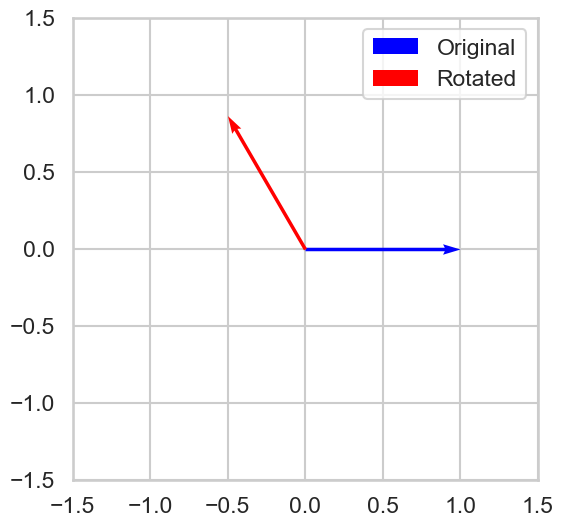

In [22]:
# Test the function
vector = np.array([1, 0])
rotated_vector = rotate_vector(vector, 120) # 120 degrees

# Draw the original and rotated vectors
# (plot_vectors function was already implemented by me and it should work out of the box)
plot_vectors(vector, rotated_vector)

# Linear regression

---

Linear regression is a simple machine learning model that tries to find a linear relationship between a dependent variable and one or more independent variables. The model is represented by the equation:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where:
- $y$ is the dependent variable
- $w_0, w_1, w_2, ..., w_n$ are the model parameters (weights)
- $x_1, x_2, ..., x_n$ are the independent variables
- $w_0$ is the bias term

You may be familiar with the equation in the form $y = ax + b$, where $a$ is the slope and $b$ is the y-intercept. This is a special case of linear regression with one independent variable, its weight $a = w_1$ and bias $b = w_0$. In general, linear regression can handle multiple independent variables, each with its own weight.

**We can apply one simple trick to make the maths a bit more elegant.** Let us rewrite the equation as:

$$y = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $x_0$ is always equal to 1, thus $w_0x_0$ always equals $w_0$. This seems redundant, as **why would we even want to multiply the bias term by 1?** Turns out, by using this trick, we can write the equation in a more compact form based on the dot product of two vectors:

$$y = x \cdot w = x^Tw$$

where:
- $y$ is the dependent variable
- $w$ is a column vector of weights (with $w_0$ as the bias term)
- $x^T$ is a row vector of independent variables (with $x_0$ always equal to 1)

<center>
<img src="imgs/linear-regression.png" width=400>
</center>

**With this approach, and thanks to the elegance of matrix algebra, we can calculate the predicted values for all observations in the dataset at once**. Instead of $x^T$ being a row vector, we can treat $x$ as a matrix with each row representing an observation and each column representing a feature. This matrix is called the **design matrix** and is denoted by $X$. The weights vector $w$ stays the same, the math still works out.

$$y = Xw$$

**Here is how the design matrix is constructed for a dataset of $m$ observations and $n$ features:**

$$X = \begin{bmatrix} 1 & x_{11} & x_{12} & \dots & x_{1n} \\ 1 & x_{21} & x_{22} & \dots & x_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{m1} & x_{m2} & \dots & x_{mn} \end{bmatrix}$$

**In the specific case of simple linear regression with one independent variable, the design matrix looks like this:**

$$X = \begin{bmatrix} 1 & x_{1} \\ 1 & x_{2} \\ \vdots & \vdots \\ 1 & x_{m} \end{bmatrix}$$

### The normal equation

The goal of linear regression is to find the weights that minimize the difference between the predicted values and the actual values of the dependent variable $y$. This difference is called the **loss** or **cost** of the model. The most common loss function used in linear regression is the **mean squared error** (MSE), which is the average of the squared differences between the predicted and actual values.

**The normal equation** lets us calculate the vector of weights that minimizes the MSE loss function. We derive it by differentiating the loss function with respect to the weights and setting the result to zero. The derivation is beyond the scope of this lab, but you can read about it [here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/).

The normal equation is given by the formula:

$$w = (X^TX)^{-1}X^Ty$$

where:
- $w$ is the column vector of weights
- $X$ is the design matrix, as explained above
- $y$ is the column vector of dependent variables

Remember that matrix multiplication is not commutative (the order of the matrices matters).


## Exercise 3: Implement linear regression in NumPy (5 points)

In this exercise, you will implement a simple linear regression model as a Python class. The class should have the following methods:

- `__init__()`: This method should initialize the weights to `None`.
- `fit(X, y)`: This method should update the weights and bias based on the data (using the normal equation).
    * `X` should be a matrix of independent variables in the shape of (observations, features).
    * `y` should be a column vector of dependent variables in the shape of (observations, 1).
- `predict(X)`: This method should return the predicted values (as a column vector) based on the stored weights and data.

Please remember, that in order to crate the **design matrix** $X$, you need to **add the column of ones** to the matrix of independent variables. This column corresponds to $x_0$, which is multiplied by $w_0$ (the bias term).

In [25]:
import numpy as np

class LinReg:
    def __init__(self):
        # your code here
        self.weights = None
    def fit(self, X, y):
        # your code here
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    def predict(self, X):
        # your code here
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_bias @ self.weights

### *Fit a linear regression model to some data

**Here is some synthetic data that you can use to test your model.** Launch the code below to see how your linear regression model finds a solution to the least squares problem.

<Axes: >

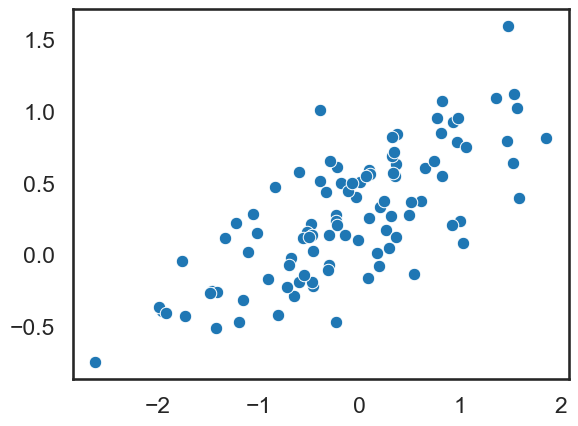

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

# load some synthetic data
df = pd.read_csv('data/linear-regression.csv')

# split the data into X and y (features and target)
X = np.array(df['X'])
y = np.array(df['y'])

# visualize the data
sns.set_style("white")
sns.set_context("talk")
sns.scatterplot(x=X, y=y)

In [27]:
# fit the model to the data

model = LinReg()
X = X.reshape(-1, 1)  # reshape X to be a column vector
y = y.reshape(-1, 1)  # reshape y to be a column vector
model.fit(X, y)

In [28]:
# see the trained parameters

b, a = model.weights    # in reverse, because the first element in the weights vector is the bias (w0)
print("Slope:", a)
print("Bias:", b)

Slope: [0.36814299]
Bias: [0.30883718]


<Axes: xlabel='X', ylabel='y'>

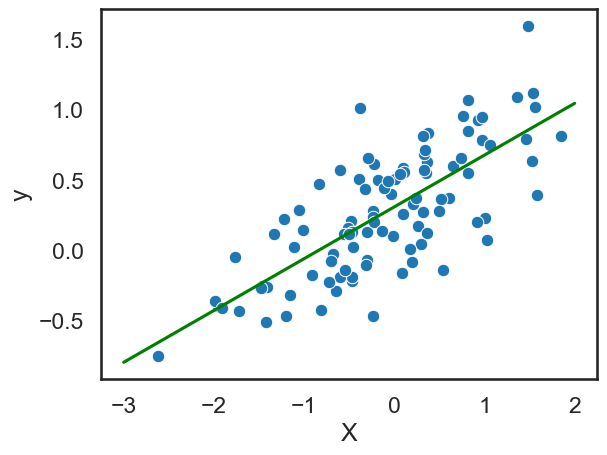

In [29]:
# plot the regression line (we will learn how to do such plots in the next lab)

sns.scatterplot(data=df, x='X', y='y')

xs = np.linspace(-3, 2, 100)
ys = xs * a + b
sns.lineplot(x=xs, y=ys, color='green')

### Scikit-learn saves the trouble of implementing ML models by hand

You do not usually implement linear regression from scratch in a real-world project. Instead, you would use a library such as `sklearn`, which provides a simple interface to train and use tons of different machine learning models.

**The scikit-learn interface is very similar to the one you implemented in the previous exercise.** Each model is implemented as a class with the methods `fit` and `predict`. Besides, scikit-learn provides many useful tools for data preprocessing, model selection, and evaluation. We will work with scikit-learn models from now on!

Slope: [0.36814299]
Bias: [0.30883718]


<Axes: xlabel='X', ylabel='y'>

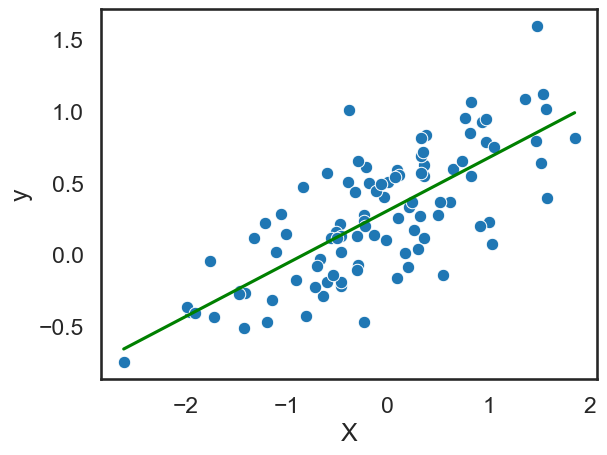

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y = model.predict(X)

print("Slope:", model.coef_[0])
print("Bias:", model.intercept_)

sns.scatterplot(data=df, x='X', y='y')
sns.lineplot(x = X.flatten(), y = y.flatten(), color='green')